# Polynomials
https://en.wikipedia.org/wiki/Polynomial

In mathematics, a polynomial is an expression consisting of variables (also called indeterminates) and coefficients, that involves only the operations of addition, subtraction, multiplication, and non-negative integer exponents of variables. An example of a polynomial of a single indeterminate x is $x^2 − 4x + 7$. An example in three variables is $x^3 + 2xyz^22 − yz + 1$.

Polynomials appear in a wide variety of areas of mathematics and science. For example, they are used to form polynomial equations, which encode a wide range of problems, from elementary word problems to complicated problems in the sciences; they are used to define polynomial functions, which appear in settings ranging from basic chemistry and physics to economics and social science; they are used in calculus and numerical analysis to approximate other functions. In advanced mathematics, polynomials are used to construct polynomial rings and algebraic varieties, central concepts in algebra and algebraic geometry.


Given a polynomial of order $N$ 

$$ P(x) = a_0 + a_1 x + a_2 x^2 \ldots = \sum\limits_{n=0}^N a_n x^n $$

we can easily evaluate it at any arbitrary point $x_i$

$$ P(x_i) = \sum\limits_{n=0}^N a_n x_i^n $$


we can easily determine the derivative with respect to $x$

$$ \frac{d}{dx} P(x) = a_1 + 2 a_2 x \ldots $$

and the integral

$$  \int P(x) dx = C + a_0 x + \frac{1}{2} a_1 x^2 \ldots $$


Many functions can be approximated by Taylor series

$$ f(x) \approx c_0 + c_1 x + c_2 x^2 \ldots = \sum\limits_{n=0}^N c_n x^n $$



These calculations can be implemented using only core python

In [6]:
def poly_eval_basic_forward(x, coeff):
    """evaluate a polynomal
    """
    
    result = 0.0
    for n,c in enumerate(coeff):
        result = result + c * x**n
    return result

In [7]:
print( poly_eval_basic_forward(0.5, [0,1,2,3,4,5]) )

1.78125


## Horner's method

Exponentiation is computationally ``expensive'' (CPU intensive).  If we reverse the order of summation then we only need multiplication and addition
$$((c_N*x + c_{N-1} )*x + c_{N-2})* x \ldots + c_0$$
which can be calculated more quickly.

In [8]:
def poly_eval_basic_reverse(x, coeff):
    result = coeff[-1]
    for c in coeff[-2::-1]:
        result = result * x + c
    return result

In [9]:
print( poly_eval_basic_reverse(0.5, [0,1,2,3,4,5]) )

1.78125


## %timeit

The IPython interpreter can execute several ``magic'' commands that can be used for code analysis.  For example, we can show that Horner's method (reverse evaluation of polynomials) is roughly twice as fast as forward evaluation.

In [10]:
 %timeit poly_eval_basic_forward(0.5, [0,1,2,3,4,5])

The slowest run took 5.09 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.81 µs per loop


In [11]:
%timeit poly_eval_basic_reverse(0.5, [0,1,2,3,4,5])

The slowest run took 4.25 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 956 ns per loop


## floating point math

Evaluating at $x=0.1$ for a large number of coefficients gives slightly different results from forward and reverse evaluation.

In [12]:
p1 = poly_eval_basic_forward(0.1, range(0,99,1) )
p2 = poly_eval_basic_reverse(0.1, range(0,99,1) )
print( p1, p2, p2-p1)

0.12345679012345678 0.12345679012345681 2.7755575615628914e-17


### Question 1: Why are the two results different?  Should we worry about this?

Answer: The two results are different in terms of final value due to the representation of floating point numbers in the computer memory system. Since between the first method and the second method, the order of calculations performed is different (and exponentiation may be an entirely different process than addition and multiplication altogether), the intermediately stored floating point values are different, resulting in different approximations along the way, resulting in slightly differing results. We should worry about this if our calculation requires high precision - in the above example, the two methods differ on the order of e-17, so we should be safe down to e-15 or so. We should also worry if we're looking to do a boolean compare between the two values - they won't produce the exact same number, resulting in false even if the two results are supposed to be the same if we naively do a direct == comparison. A comparison to check similarity down to a certain tolerance is more robust for floating point comparisons: abs(resultOne - resultTwo) < 1e-14, for example.

In terms of differing in terms of amount of time required to process it, it is mentioned above that exponentiation is a time consuming process. Furthermore, in Horner's method, we only do addition and multiplication, whereas in the forward eval method, we do addition, multiplication and exponentation - we have one extra step altogether. If for any given input length n, one method performs two operations on n and another performs three, and the two operations are also present in the three operations, then the two operations method will be faster.

## math

Python provides support for basic integer and floating point arithmetic as part of the language core.  Additional functionality is provided by the ``math'' module.  Information about these functions can be obtained by typing 
 ``dir(math)'' or ``help(math)''.

In [13]:
import math
help( math.factorial)
print( '99! =',  math.factorial(99) )

Help on built-in function factorial in module math:

factorial(...)
    factorial(x) -> Integral
    
    Find x!. Raise a ValueError if x is negative or non-integral.

99! = 933262154439441526816992388562667004907159682643816214685929638952175999932299156089414639761565182862536979208272237582511852109168640000000000000000000000


## numpy

Although the core python math is actually quite good, we will tend to use tools provided by the numpy and scipy modules.

<pre>
import numpy as np
import scipy.special as specfunc
</pre>

Numpy is especially useful for vectorized operations when we want to apply the same transformation to a sequence of numbers.  This can be done in python using lists, but using numpy arrays is often more convenient and usually much faster.

In [14]:
%timeit y = [x**2 for x in range(99)]


10000 loops, best of 3: 32.1 µs per loop


In [15]:
import numpy as np
%timeit y = np.arange(99)**2

The slowest run took 26.69 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.37 µs per loop


Note that the previous evaluation routines were written in such a way that we can pass numpy arrays instead of lists and everything will just work.

In [16]:
x = np.array([0.1, 0.5, 0.99])
coeff = np.arange(0,99,1)
poly_eval_basic_reverse(x, coeff)

array([  1.23456790e-01,   2.00000000e+00,   2.57935317e+03])

### Question 2: Write a function which uses numpy to evaluate the Taylor series expansion of sin(x) for an array of x, and an arbitrary number of terms ie.
<pre>
def sin_eval_taylor(x, ncoeff):
    """
     docstring goes here
    """
    ...
     calculations go here
    ...
    
    return result
</pre>

In [80]:
def sin_eval_taylor(x, ncoeff, forward = False):
    '''
    First, we're assuming that we're doing a MacLaurin series,
    according to the fact that there's no parameter for
    approximating around some given value.
    
    So the basic idea is that we know the value of the derrivatives
    of sine around 0: 0, 1, 0, -1, in a cycle. We divide the value by
    the factorial of its nth term, according to the Taylor series
    formulation. From there, we calculate the Taylor polynomial
    using the previously defined polynomial calculation function
    for each input x value, and return a list whose values corrispond
    to the value evaluated by the Taylor series.
    
    #This function utilizes the two prior functions above - forward
    calculation and backwards Horner's method function.
    
    This function crashes at ncoeff>180 or so, due to floating point
    calculation problems.
    
    This function uses the reverse evaluation method.
    '''
    #Generates the coefficients for the polynomial calculations.
    coefficients = []
    n = ncoeff+1
    for aCoefficient in range(n):
        factorialValue = np.math.factorial(aCoefficient)
        if aCoefficient % 4 == 0 or aCoefficient % 4 == 2:
            coefficients.append(0)
        elif aCoefficient % 4 == 1:
            coefficients.append(1.0/factorialValue)
        elif aCoefficient % 4 == 3:
            coefficients.append(-1.0/factorialValue)
    #Generates the calculated results.
    result = []
    if forward:
        for value in x:
            result.append(poly_eval_basic_forward(value, coefficients))
    else:
        for value in x:
            result.append(poly_eval_basic_reverse(value, coefficients))
    return result
print(sin_eval_taylor([0.5], 99))
%timeit sin_eval_taylor([0.5], 99)
%timeit sin_eval_taylor([0.5], 99, True)

[0.479425538604203]
10000 loops, best of 3: 114 µs per loop
10000 loops, best of 3: 131 µs per loop


## matplotlib

Graphing and graphical display support is provided by the matplotlib module, typically imported as ``plt''.


In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

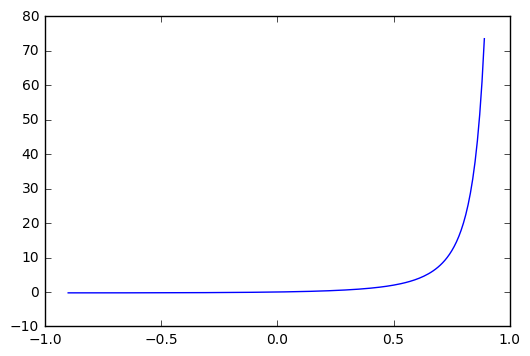

In [70]:
x = np.arange(-0.9, 0.9, 0.01)
coeff = np.arange(0,99,1)
y = poly_eval_basic_reverse(x, coeff)
plt.plot(x,y)

### Question 3: Use sin_eval_taylor to plot Taylor series expansions of sin(x) for order n=4, 9, 19, 99 and compare to the "true" value.  Try to make the figure look *exactly* like the one included below.

<img src="../fig/sin_taylor_series.png">

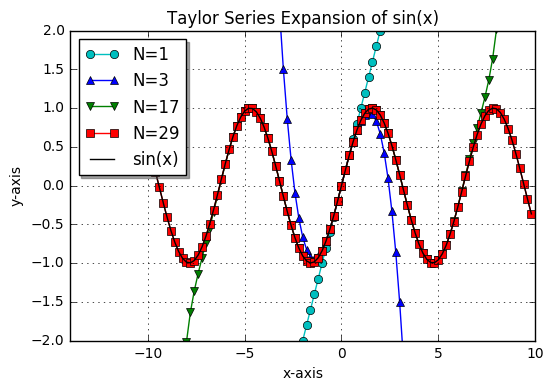

In [81]:
#Initial chart math, calculates the values.
x = np.arange(-10, 10, 0.2)
N3 = sin_eval_taylor(x, 1)
N9 = sin_eval_taylor(x, 3)
N19 = sin_eval_taylor(x, 17)
N99 = sin_eval_taylor(x, 29)
sineValue = np.sin(x)

#Sets up the chart, limiting size and specifying grid.
plt.axis((-14,10,-2.0,2.0))
plt.grid(True)

#Labels and plots the chart.
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Taylor Series Expansion of sin(x)")
plt.plot(x, N3, "co-", x, N9, "b^-", x, N19, "gv-", x, N99, "rs-", x, sineValue, "k-")
plt.legend(['N=1', 'N=3', 'N=17', 'N=29', 'sin(x)'], loc = 'upper left', shadow = True)

### Question 4: What are the absolute and the relative error (in percent) for Taylor series expansion of sin(x) at x=0.5 for n=3, 9, 29? Compare results of forward summing to reverse.  How else might we reduce roundoff error?


In [84]:
#Run program to get absolute and relative errors.
def getResults(forward = False, inputType = np.float64, inputValue = 0.5):
    #Calculates results
    x = np.array([inputValue], dtype = inputType)
    N3 = sin_eval_taylor(x, 3, forward)
    N9 = sin_eval_taylor(x, 9, forward)
    N29 = sin_eval_taylor(x, 29, forward)
    sineValue = np.sin(x)

    #Calculates Abs Error
    N3Error = np.abs(N3[0]-sineValue[0])
    N9Error = np.abs(N9[0]-sineValue[0])
    N29Error = np.abs(N29[0]-sineValue[0])

    #Calculates Rel. Error
    N3RelError = np.abs(N3Error/sineValue[0] * 100)
    N9RelError = np.abs(N9Error/sineValue[0] * 100)
    N29RelError = np.abs(N29Error/sineValue[0] * 100)

    #Prints Case:
    if forward:
        print("Forward Case Results:")
    else:
        print("Reverse Case Results:")

    #Prints Results:
    print("Absolute N3 Error is:", N3Error)
    print("Relative N3 Error is:", N3RelError, "%")
    print("Absolute N9 Error is:", N9Error)
    print("Relative N9 Error is:", N9RelError, "%")
    print("Absolute N29 Error is:", N29Error)
    print("Relative N29 Error is:", N29RelError, "%")
    print()
getResults(True)
getResults()

Forward Case Results:
Absolute N3 Error is: 0.000258871937536
Relative N3 Error is: 0.0539962761037 %
Absolute N9 Error is: 1.22128973601e-11
Relative N9 Error is: 2.54740233398e-09 %
Absolute N29 Error is: 0.0
Relative N29 Error is: 0.0 %

Reverse Case Results:
Absolute N3 Error is: 0.000258871937536
Relative N3 Error is: 0.0539962761037 %
Absolute N9 Error is: 1.22128973601e-11
Relative N9 Error is: 2.54740233398e-09 %
Absolute N29 Error is: 0.0
Relative N29 Error is: 0.0 %



Comparing the Forward and Reverse cases above, the results of forward and backwards summation is identical in terms of errors and percentage errors - it would seem that whatever roundoff errors are introduced by the particular methods, as noted in prior questions, are drowned off by the taylor series approximation errors where they might matter, and then eliminated when floating point sizes are increased. Reducing roundoff error can be done by increasing float size and reducing algebraic operations, but note in this case Taylor series approximation errors are bigger than the roundoff errors and increase with reduced algebratic operations (with lower N).

### Question 5: What happens if we use different floating point precision ie. np.float16, np.float32, np.float64, np.float128 for the calculations in Question 4?  Briefly discuss the advantages and disadvantages of using different floating point types.

Firstly, as we ascend from float16 to float128, we see that the absolute and relative error drops up to a point - the relative error in N=3 is many times larger than the relative error in N=9, but between N=99 and N=9, the results are virtually identical at smaller float sizes. At larger float sizes, the difference between the two becomes significant. The code that justifies these observations is as below.

Secondly, float16 to float128 exist on a spectrum relative to each other, where float16 is the quickest data type to use because it utilizes the least data (16 bits), but is also the least precise because it uses less data and so has greater roundoff error, and vice versa on the other end of the spectrum for float128. Such are the advantages and disadvantages of each float type. In general, if you need quick calculations and don't need high precision, use a lower end floating point number like float16, and if you need high accuracy and precision, utilize float128 instead, with the floats in between being chosen for being an intermediary of these charecteristics.


In [74]:
getResults(inputType = np.float16)
getResults(inputType = np.float32)
getResults(inputType = np.float64)
getResults(inputType = np.float128)

Reverse Case Results:
Absolute N3 Error is: -0.000325520833333
Relative N3 Error is: -0.0678886625933 %
Absolute N9 Error is: -6.66488835841e-05
Relative N9 Error is: -0.0138998893666 %
Absolute N29 Error is: -6.6648895797e-05
Relative N29 Error is: -0.0138998919137 %

Reverse Case Results:
Absolute N3 Error is: -0.000258882840474
Relative N3 Error is: -0.0539985490428 %
Absolute N9 Error is: -1.08907252105e-08
Relative N9 Error is: -2.27161969606e-06 %
Absolute N29 Error is: -1.09029381079e-08
Relative N29 Error is: -2.27416709834e-06 %

Reverse Case Results:
Absolute N3 Error is: -0.000258871937536
Relative N3 Error is: -0.0539962761037 %
Absolute N9 Error is: 1.22128973601e-11
Relative N9 Error is: 2.54740233398e-09 %
Absolute N29 Error is: 0.0
Relative N29 Error is: 0.0 %

Reverse Case Results:
Absolute N3 Error is: -0.000258871937536
Relative N3 Error is: -0.0539962761037 %
Absolute N9 Error is: 1.22128959235e-11
Relative N9 Error is: 2.54740203433e-09 %
Absolute N29 Error is: 1.1